In [1]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#conda install -q numpy
#conda install -c -q intel mkl

In [2]:
G = ox.graph_from_place('London', network_type='drive')

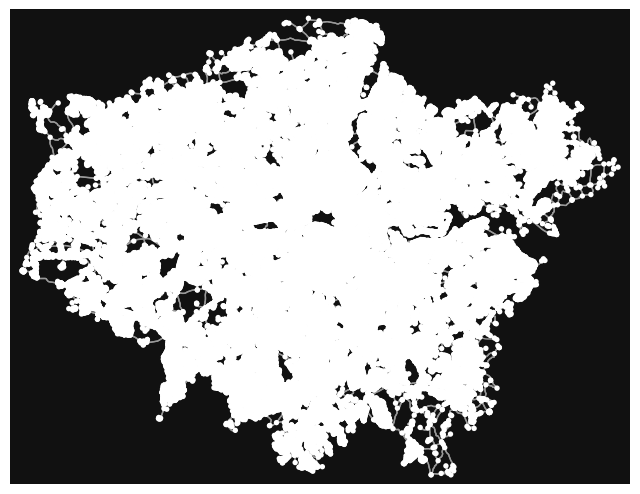

In [3]:
fig, ax = ox.plot_graph(G)

**Import dataset**

In [4]:
df = pd.read_csv('London_flats_for_rent.csv')

In [5]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.shape

(5379, 19)

In [8]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000
mean,364.389747,2.857966,0.279792,0.357873,9.193902,90.921175,1.133110,5.327620,1.016534,294.575060,20.477061,625.612765,11.197378,-0.114782,51.503457
std,437.742534,1.251068,0.448939,0.479419,1.151321,11.289857,0.577676,2.705986,1.265193,170.516734,11.853283,388.206414,6.948218,0.067520,0.031966
min,54.328653,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.040561,0.013875,68.740518,4.778421,140.521722,2.515094,-0.251700,51.414400
25%,174.510219,2.000000,0.000000,0.000000,9.000000,87.000000,1.000000,3.545684,0.324035,177.224481,12.319565,382.129695,6.839456,-0.169960,51.485690
50%,268.115431,2.000000,0.000000,0.000000,10.000000,94.000000,1.000000,4.939138,0.536131,247.646069,17.214844,527.347208,9.438596,-0.118130,51.509640
75%,438.274654,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,6.838065,1.090765,361.070549,25.099422,764.221221,13.678228,-0.067725,51.525720
max,12937.275101,6.000000,1.000000,1.000000,10.000000,100.000000,8.000000,17.321199,9.174094,1438.561236,100.000000,5587.136047,100.000000,0.120180,51.575820


**EDA**

Text(0, 0.5, 'Probability')

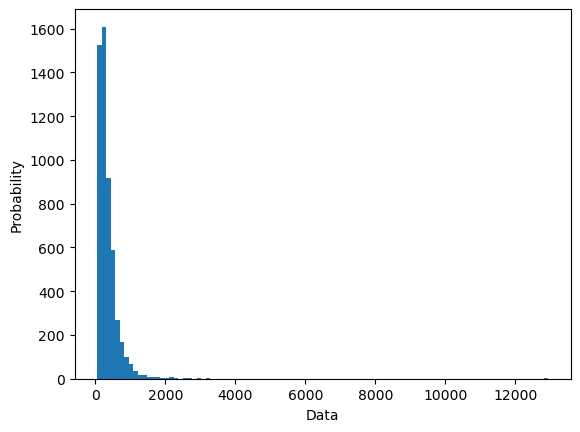

In [9]:
prices = df['realSum'].values
plt.hist(prices, bins=100)
plt.xlabel('Data')
plt.ylabel('Probability')

In [10]:
df = df[df['realSum'] < df['realSum'].quantile(.99)]

Text(0, 0.5, 'Probability')

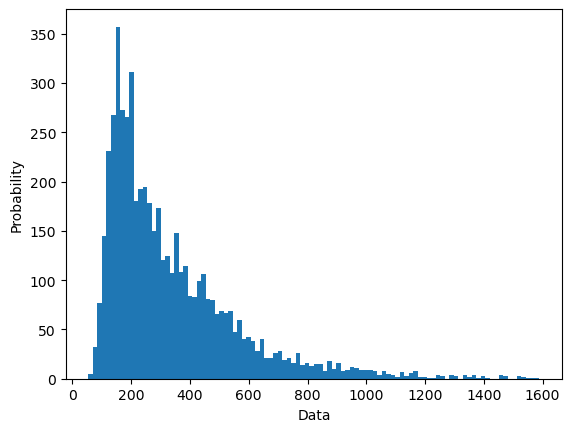

In [11]:
prices = df['realSum'].values
plt.hist(prices, bins=100)
plt.xlabel('Data')
plt.ylabel('Probability')

In [12]:
df.shape

(5325, 19)

In [13]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,5325.000000,5325.000000,5325.000000,5325.000000,5325.00000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000
mean,337.182328,2.838498,0.278873,0.357746,9.19061,90.881878,1.122629,5.350772,1.022484,292.338357,20.321579,621.116957,11.116911,-0.114644,51.503405
std,229.444980,1.234453,0.448487,0.479382,1.14890,11.278380,0.564895,2.701776,1.269934,167.406388,11.637071,382.866711,6.852647,0.067685,0.032084
min,54.328653,2.000000,0.000000,0.000000,2.00000,20.000000,0.000000,0.040561,0.013875,68.740518,4.778421,140.521722,2.515094,-0.251700,51.414400
25%,174.510219,2.000000,0.000000,0.000000,9.00000,87.000000,1.000000,3.562482,0.325252,176.923962,12.298674,381.443579,6.827175,-0.170460,51.485470
50%,265.057974,2.000000,0.000000,0.000000,10.00000,94.000000,1.000000,4.954088,0.539882,246.413867,17.129189,524.458258,9.386889,-0.117970,51.509610
75%,432.277335,4.000000,1.000000,1.000000,10.00000,99.000000,1.000000,6.860639,1.104508,359.905771,25.018453,760.977514,13.620172,-0.067610,51.525810
max,1588.701522,6.000000,1.000000,1.000000,10.00000,100.000000,8.000000,17.321199,9.174094,1438.561236,100.000000,5587.136047,100.000000,0.120180,51.575820


In [14]:
df.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [15]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
df_g = pd.get_dummies(df, drop_first=True)

In [17]:
df_g.shape

(5325, 20)

In [18]:
df.replace({False: 0, True: 1}, inplace=True)

In [19]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.122322,Private room,0,1,2.0,0,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,195.912416,Private room,0,1,2.0,0,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,193.325337,Private room,0,1,3.0,0,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,180.389943,Private room,0,1,2.0,0,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,405.700981,Entire home/apt,0,0,3.0,0,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


**Selection of data for your request**

In [20]:
df['realSum'].quantile(.2)

159.22293562877772

In [21]:
df = df[df['realSum'] < df['realSum'].quantile(.2)]

In [22]:
len(df)

1061

Text(0, 0.5, 'Probability')

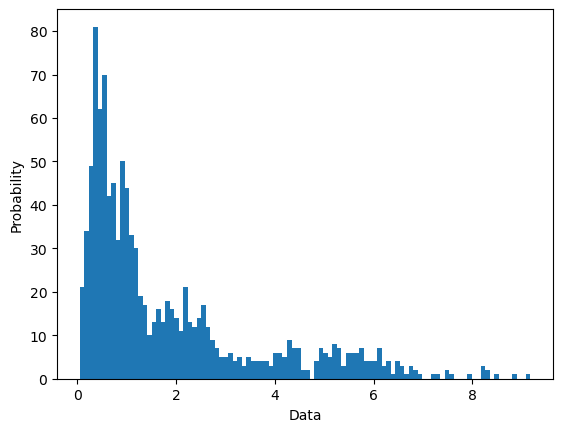

In [23]:
dist = df['metro_dist'].values
plt.hist(dist, bins=100)
plt.xlabel('Data')
plt.ylabel('Probability')

In [24]:
df = df[df['metro_dist'] < 1]

In [25]:
df = df[df['rest_index_norm'] > df['rest_index_norm'].mean()]
df = df[df['attr_index_norm'] > df['attr_index_norm'].mean()]
df = df[df['guest_satisfaction_overall'] > df['guest_satisfaction_overall'].mean()]
df = df[df['bedrooms']==1]

In [26]:
len(df)

43

In [27]:
df = df[df['realSum'] < df['realSum'].quantile(.5)]

In [28]:
len(df)

21

**Find the object closest to Buckingham Palace**

In [29]:
longitude = df['lng'].values
latitude = df['lat'].values

In [30]:
longitude_BP = -0.14194
latitude_BP = 51.50083

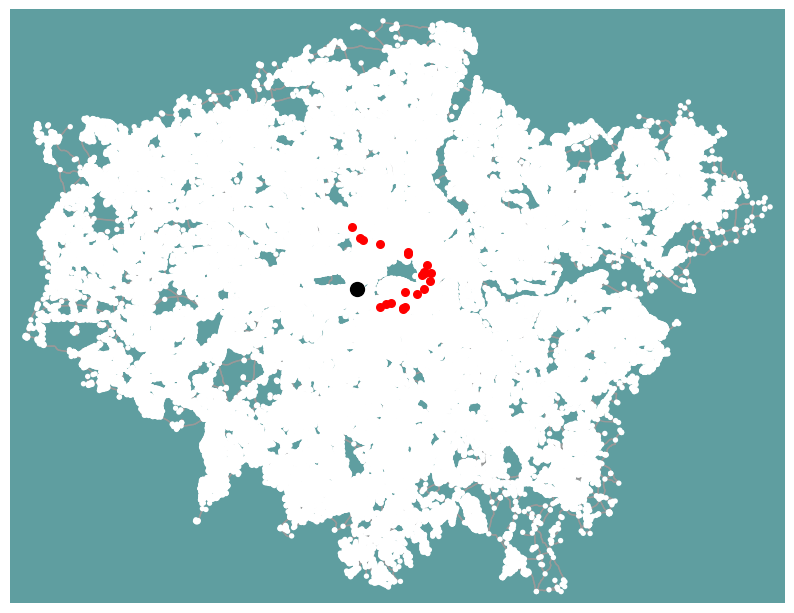

In [31]:
fig, ax = ox.plot_graph( G, figsize=(10, 10), bgcolor='#5F9EA0', show=False, close=False )

ax.scatter( longitude, latitude, c='red', s=30 )
ax.scatter( longitude_BP, latitude_BP, c='black', s=100 )

plt.show()

**Taking one path**

In [34]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
G = ox.distance.add_edge_lengths(G)

In [35]:
point1 = ox.distance.nearest_nodes(G, longitude_BP, latitude_BP)
point2 = ox.distance.nearest_nodes(G, longitude[0], latitude[0])

In [36]:
route = ox.distance.shortest_path(G, point1, point2)

In [37]:
distance = round(sum(ox.utils_graph.route_to_gdf(G, route)['length']), 0)
time = round(sum(ox.utils_graph.route_to_gdf(G, route)['travel_time']), 0)

In [38]:
print(distance, 'meters in', time, 'seconds with speed 32kph')

5807.0 meters in 656.0 seconds with speed 32kph


**All paths**

In [39]:
distances = []
times = []
for i in range(len(latitude)):
    point2 = ox.distance.nearest_nodes(G, longitude[i], latitude[i])
    route = ox.distance.shortest_path(G, point1, point2)
    distance = round(sum(ox.utils_graph.route_to_gdf(G, route)['length']), 0)
    time = round(sum(ox.utils_graph.route_to_gdf(G, route)['travel_time']), 0)
    distances.append(distance)
    times.append(time)

    print(distance, 'meters in', time, 'seconds with speed 32kph')

5807.0 meters in 656.0 seconds with speed 32kph
5768.0 meters in 631.0 seconds with speed 32kph
6132.0 meters in 678.0 seconds with speed 32kph
4733.0 meters in 533.0 seconds with speed 32kph
4941.0 meters in 556.0 seconds with speed 32kph
5147.0 meters in 566.0 seconds with speed 32kph
5858.0 meters in 658.0 seconds with speed 32kph
5092.0 meters in 575.0 seconds with speed 32kph
5550.0 meters in 625.0 seconds with speed 32kph
6864.0 meters in 771.0 seconds with speed 32kph
3154.0 meters in 357.0 seconds with speed 32kph
7971.0 meters in 887.0 seconds with speed 32kph
2762.0 meters in 312.0 seconds with speed 32kph
2790.0 meters in 315.0 seconds with speed 32kph
4117.0 meters in 451.0 seconds with speed 32kph
4666.0 meters in 515.0 seconds with speed 32kph
4720.0 meters in 521.0 seconds with speed 32kph
7555.0 meters in 845.0 seconds with speed 32kph
4666.0 meters in 515.0 seconds with speed 32kph
7506.0 meters in 825.0 seconds with speed 32kph
6976.0 meters in 783.0 seconds with spee

In [40]:
res = df.iloc[np.argmin(distances)]
print(res)

realSum                         134.528093
room_type                     Private room
room_shared                              0
room_private                             1
person_capacity                        2.0
host_is_superhost                        0
multi                                    0
biz                                      0
cleanliness_rating                     9.0
guest_satisfaction_overall            92.0
bedrooms                                 1
dist                               2.28843
metro_dist                        0.441883
attr_index                      446.287048
attr_index_norm                  31.023153
rest_index                      716.170419
rest_index_norm                  12.818203
lng                               -0.11085
lat                               51.49058
Name: 4338, dtype: object


In [ ]:
fig, ax = ox.plot_graph( G, figsize=(10, 10), bgcolor='#5F9EA0', show=False, close=False )

ax.scatter( res['lng'], res['lat'], c='red', s=30 )
ax.scatter( longitude_BP, latitude_BP, c='black', s=100 )

plt.show()